<a href="https://colab.research.google.com/github/PatilShreya22/6thSem-ML-Lab/blob/main/1BM23CS420_Lab_8_AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy with 10 estimators: 0.8277
Confusion Matrix (10 estimators):
 [[10722   387]
 [ 2138  1406]]

Best Accuracy: 0.831 with n_estimators = 42


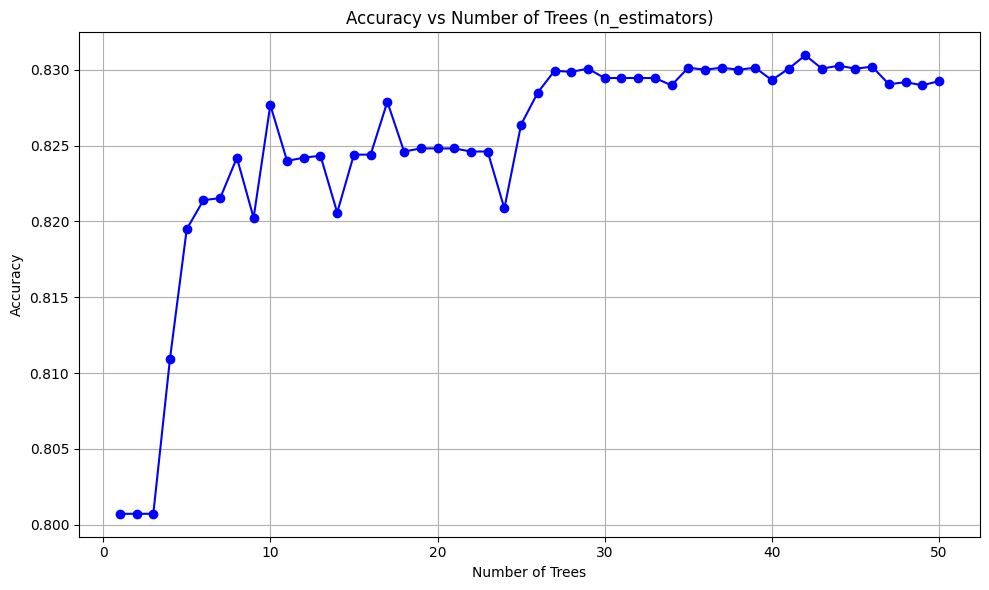

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Step 1: Load the dataset
df = pd.read_csv("/content/income.csv")

# Step 2: Split into features and target
X = df.drop(columns=['income_level'])
y = df['income_level']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: AdaBoost with 10 estimators
model_10 = AdaBoostClassifier(n_estimators=10, random_state=42)
model_10.fit(X_train, y_train)
y_pred_10 = model_10.predict(X_test)
accuracy_10 = accuracy_score(y_test, y_pred_10)
conf_matrix_10 = confusion_matrix(y_test, y_pred_10)

print("Accuracy with 10 estimators:", round(accuracy_10, 4))
print("Confusion Matrix (10 estimators):\n", conf_matrix_10)

# Step 5: Fine-tune number of trees (1 to 50)
best_accuracy = 0
best_n = 0
accuracies = []

for n in range(1, 51):
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

    if acc > best_accuracy:
        best_accuracy = acc
        best_n = n

print(f"\nBest Accuracy: {round(best_accuracy, 4)} with n_estimators = {best_n}")

# Step 6: Plot accuracy vs. number of estimators
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), accuracies, marker='o', linestyle='-', color='blue')
plt.title('Accuracy vs Number of Trees (n_estimators)')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.tight_layout()
plt.show()
